# 線形判別モデル

## モデル

### 2クラスの場合

2クラス$(C_1, C_2)$を識別する線形モデルを考える。

特徴量ベクトルを$\boldsymbol{x}=(x_1, \cdots, x_d)^\top$、係数ベクトルを$\boldsymbol{w}=(w_1, \cdots, w_d)^\top$、バイアス項を$w_0$とすれば、

$$
f(\boldsymbol{x}) = w_0 + \boldsymbol{w}^\top \boldsymbol{x}
$$

で表される。

識別境界を$f(\boldsymbol{x})=0$として、$f(\boldsymbol{x})=0$のときはリジェクトせずに$C_1$とする場合、予測値$\hat{C}$を出力する識別規則は

$$
\begin{cases}
C_1 & (f(\boldsymbol{x}) \geq 0)\\
C_2 & (f(\boldsymbol{x}) < 0)
\end{cases}
$$

となる。

### 多クラスの場合

クラス数が$K(>2)$個ある場合にはどうすればよいだろうか。

いくつか方法はある（はじパタ 6.1.2などを参照）が、最大識別関数法が現状もっとも良さそう。

これは$K$個の線形識別関数$f_j(\boldsymbol{x}) \ (j = 1, 2, \cdots, K)$を用意して、最も出力値が大きいクラスを採用するというもの。

$$
\hat{C} = \arg \max_j f_j(\boldsymbol{x})
$$


## パラメータの推定

### 最小二乗誤差基準

係数ベクトルにバイアスを含めて$\boldsymbol{w}=(w_0, w_1, \cdots, w_d)^\top$とし、特徴量ベクトルを$\boldsymbol{x}=(1, x_1, \cdots, x_d)^\top$と表記することにする。

それにより、線形識別関数を

$$
f(\boldsymbol{x}) = \boldsymbol{w}^\top \boldsymbol{x}
$$

と表記する。

教師ラベルは$\{+1, -1\}$で表現されるものとする。

$$
t_i = 
\begin{cases}
+1 & (\boldsymbol{x}_i \in C_1)\\
-1 & (\boldsymbol{x}_i \in C_2)
\end{cases}
$$

ここで$i$はサンプルの添字で$i = 1, \cdots, N$である。

特徴量を行列$\boldsymbol{X} = (\boldsymbol{x}_1, \cdots, \boldsymbol{x}_N)^\top$、教師ラベルのベクトルを$\boldsymbol{t}=(t_1, \cdots, t_N)^\top$と表記する。

二乗誤差$E(\boldsymbol{w})$を使って評価すると、次のようになる。

$$
\begin{align}
E(\boldsymbol{w})
&= \sum^N_{i=1} (t_i - f(\boldsymbol{x}_i))^2\\
&= (\boldsymbol{t} - \boldsymbol{X} \boldsymbol{w})^\top (\boldsymbol{t} - \boldsymbol{X} \boldsymbol{w})\\
&= \boldsymbol{t}\top \boldsymbol{t} - 2 \boldsymbol{t}^\top \boldsymbol{X} \boldsymbol{w}
 + \boldsymbol{w}^\top \boldsymbol{X}^\top \boldsymbol{X} \boldsymbol{w}
\end{align}
$$



```{margin}
式展開の詳細、あとで書く
```


二乗誤差を最小にするパラメータ$\boldsymbol{w}$はパラメータで微分して0になるパラメータなので、

$$
\frac{\partial E(\boldsymbol{w})}{\partial \boldsymbol{w}}
= -2 \boldsymbol{X}^\top \boldsymbol{t} + 2 \boldsymbol{X}^\top \boldsymbol{X} \boldsymbol{w} = 0
$$

を解くことにより

$$
\hat{\boldsymbol{w}} = (\boldsymbol{X}^\top \boldsymbol{X})^{-1} \boldsymbol{X}^\top \boldsymbol{t}
$$

である。

### 実装

以下のようなデータがあったとする

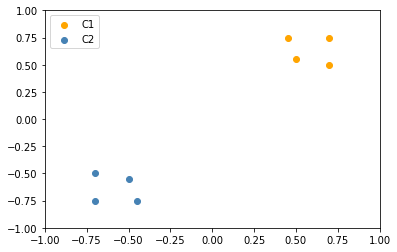

In [20]:
# 2次元に描いた場合
import numpy as np
import matplotlib.pyplot as plt

# このようなデータがあったとする
x_c1 = np.array([
    [.50, .55],
    [.45, .75],
    [.7, .50],
    [.7, .75],
])
x_c2 = - x_c1
X = np.append(x_c1, x_c2, axis=0)
y = np.array([1] * x_c1.shape[0] + [-1] * x_c2.shape[0])


def plot_hyperplane(X, y, ax):
    # データ点の散布図
    is_1 = y == 1
    ax.scatter(X[is_1, 0], X[is_1, 1], label="C1", color="orange")
    ax.scatter(X[~is_1, 0], X[~is_1, 1], label="C2", color="steelblue")

    # # x軸, y軸を描く
    # ax.hlines(0, -1, 1, colors="black", linewidth=1)
    # ax.vlines(0, -1.1, 1.1, colors="black", linewidth=1)

    ax.legend(loc="upper left")
    return ax

fig, ax = plt.subplots()
plot_hyperplane(X, y, ax)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
fig.show()

In [21]:
# 最小二乗法によるパラメータの推定
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([0.78271718, 0.82605555])

このパラメータによる識別超平面を描くと次の図のようになる

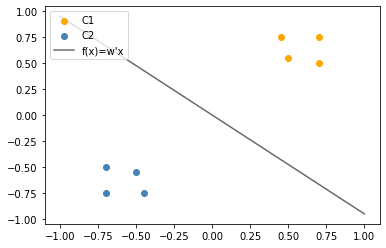

In [22]:
# 描画範囲
x1 = np.linspace(-1, 1, 100)

# 超平面：x2 = -(w1/w2) * x1の形にする
x2 = -(w[0] / w[1]) * x1

# plot
fig, ax = plt.subplots()
plot_hyperplane(X, y, ax)
ax.plot(x1, x2, color="dimgray", label="f(x)=w'x")
ax.legend(loc="upper left")
fig.show()